# ML analysis

### Dependencies

In [11]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

### Initialize relevant paths

In [12]:
preprocessed_dir_path = os.path.join(os.getcwd(), "Preprocessed_Data")
# individuals_data = os.path.join(preprocessed_dir_path, "individual_gendered_1.csv")
# organization_data = os.path.join(preprocessed_dir_path, "localized_df_1.csv")
df_in_path = os.path.join(preprocessed_dir_path, "encoded_2_for_ML.csv")

### Start classification prediction using encoded variables

In [13]:
df_in = pd.read_csv(df_in_path)
# print(df_localized.head())
print(df_in.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75918 entries, 0 to 75917
Data columns (total 58 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Unnamed: 0                                                                        75918 non-null  int64  
 1   index                                                                             75918 non-null  int64  
 2   Value                                                                             75918 non-null  float64
 3   DonorName                                                                         75918 non-null  object 
 4   val_split                                                                         75918 non-null  object 
 5   ladnm                                                                             38064 non-null  object 
 6 

In [14]:
X_all = df_in.iloc[:, 28:]
print(X_all.head())
print("_________________________________________")
print()
# print(X_local.info())
y_all = df_in.iloc[:, 4]
print(y_all.head())

   RegulatedEntityType_Permitted Participant  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   RegulatedEntityType_Political Party  RegulatedEntityType_Regulated Donee  \
0                                  0.0                                  1.0   
1                                  0.0                                  1.0   
2                                  0.0                                  1.0   
3                                  0.0                                  1.0   
4                                  0.0                                  1.0   

   RegulatedEntityType_Third Party  DonorStatus_Building Society  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0

In [15]:
X_train, X_test_val, y_train, y_test_val = train_test_split(
    X_all, y_all, test_size=0.2, random_state=21, stratify=y_all, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(
    X_test_val, y_test_val, test_size=0.5, random_state=84, stratify=y_test_val, shuffle=True)
print(len(y_train))
print(len(y_val))
print(len(y_test))

60734
7592
7592


# explore model params

In [16]:
# clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
# y_pred_logreg = clf.predict(X_val)
# score_acc = accuracy_score(y_val, y_pred_logreg)
# print(score_acc)

In [17]:
max_accuracies = {}

In [18]:
C_var = [0.1, 1.0, 10.0]

acc_list = []

for i in C_var:
    clf = LogisticRegression(random_state=0, max_iter=1000, C=i).fit(X_train, y_train)
    y_pred_logreg = clf.predict(X_val)
    score_acc = accuracy_score(y_val, y_pred_logreg)
    print(score_acc)
    acc_list.append(score_acc)

print("max: ", max(acc_list))
print("idx: ",acc_list.index(max(acc_list)))

clf = LogisticRegression(random_state=0, max_iter=1000, C=C_var[acc_list.index(max(acc_list))]).fit(X_train, y_train)
y_pred_logreg = clf.predict(X_val)

max_accuracies["LogisticRegression"] = accuracy_score(y_val, y_pred_logreg)

0.4213645943097998
0.42189146469968386
0.42189146469968386
max:  0.42189146469968386
idx:  1


In [19]:
depth_var = [5, 10, 15, 20, 25]

acc_list = []

for i in depth_var:
    clf = DecisionTreeClassifier(random_state=0, max_depth=i).fit(X_train, y_train)
    y_pred_dt = clf.predict(X_val)
    score_acc = accuracy_score(y_val, y_pred_dt)
    print(score_acc)
    acc_list.append(score_acc)

print("max: ", max(acc_list))
print("idx: ",acc_list.index(max(acc_list)))
clf = DecisionTreeClassifier(random_state=0, max_depth=depth_var[acc_list.index(max(acc_list))]).fit(X_train, y_train)
y_pred_dt = clf.predict(X_val)

max_accuracies["DecisionTreeClassifier"] = accuracy_score(y_val, y_pred_dt)

0.40858798735511065
0.42492096944151736
0.4297945205479452
0.43005795574288724
0.43005795574288724
max:  0.43005795574288724
idx:  3


In [20]:
depth_var = [5, 10, 15, 20, 25]

acc_list = []

for i in depth_var:
    clf = RandomForestClassifier(random_state=0, max_depth=i).fit(X_train, y_train)
    y_pred_randfor = clf.predict(X_val)
    score_acc = accuracy_score(y_val, y_pred_randfor)
    print(score_acc)
    acc_list.append(score_acc)

print("max: ", max(acc_list))
print("idx: ",acc_list.index(max(acc_list)))
clf = RandomForestClassifier(random_state=0, max_depth=depth_var[acc_list.index(max(acc_list))]).fit(X_train, y_train)
y_pred_randfor = clf.predict(X_val)

max_accuracies["RandomForestClassifier"] = accuracy_score(y_val, y_pred_randfor)

0.41504214963119074
0.42821390937829296
0.42913593256059007
0.4303213909378293
0.4303213909378293
max:  0.4303213909378293
idx:  3


In [21]:
k_var = [7, 8, 15, 45, 50, 55, 100]

acc_list = []

for i in k_var:
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred_knn = clf.predict(X_val)
    score_acc = accuracy_score(y_val, y_pred_knn)
    print(score_acc)
    acc_list.append(score_acc)

print("max: ", max(acc_list))
print("idx: ",acc_list.index(max(acc_list)))
clf = KNeighborsClassifier(n_neighbors=k_var[acc_list.index(max(acc_list))]).fit(X_train, y_train)
y_pred_knn = clf.predict(X_val)

max_accuracies["KNeighborsClassifier"] = accuracy_score(y_val, y_pred_knn)

0.40213382507903056
0.40042149631190727
0.40727081138040044
0.4254478398314015
0.4255795574288725
0.42360379346680715
0.4220231822971549
max:  0.4255795574288725
idx:  4


In [22]:
C_var = [0.1, 1.0, 10.0]
# C_fast = [10.0]

acc_list = []

for i in C_fast:
    clf = SVC(random_state=0, C=i).fit(X_train, y_train)
    y_pred_svc = clf.predict(X_val)
    score_acc = accuracy_score(y_val, y_pred_svc)
    print(score_acc)
    acc_list.append(score_acc)

print("max: ", max(acc_list))
print("idx: ",acc_list.index(max(acc_list)))
clf = SVC(random_state=0, C=C_fast[acc_list.index(max(acc_list))]).fit(X_train, y_train)
y_pred_svc = clf.predict(X_val)

max_accuracies["SVC"] = accuracy_score(y_val, y_pred_svc)

0.4301896733403583
max:  0.4301896733403583
idx:  0


In [23]:
model = XGBClassifier()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

model.fit(X_train, y_train_enc)

y_pred_xgb = model.predict(X_val)
y_pred_xgb = le.inverse_transform(y_pred_xgb)
# predictions = [round(value) for value in y_pred_xgb]

accuracy = accuracy_score(y_val, y_pred_xgb)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(f"Accuracy: {accuracy}")

max_accuracies["XGBClassifier"] = accuracy

Accuracy: 0.4303213909378293


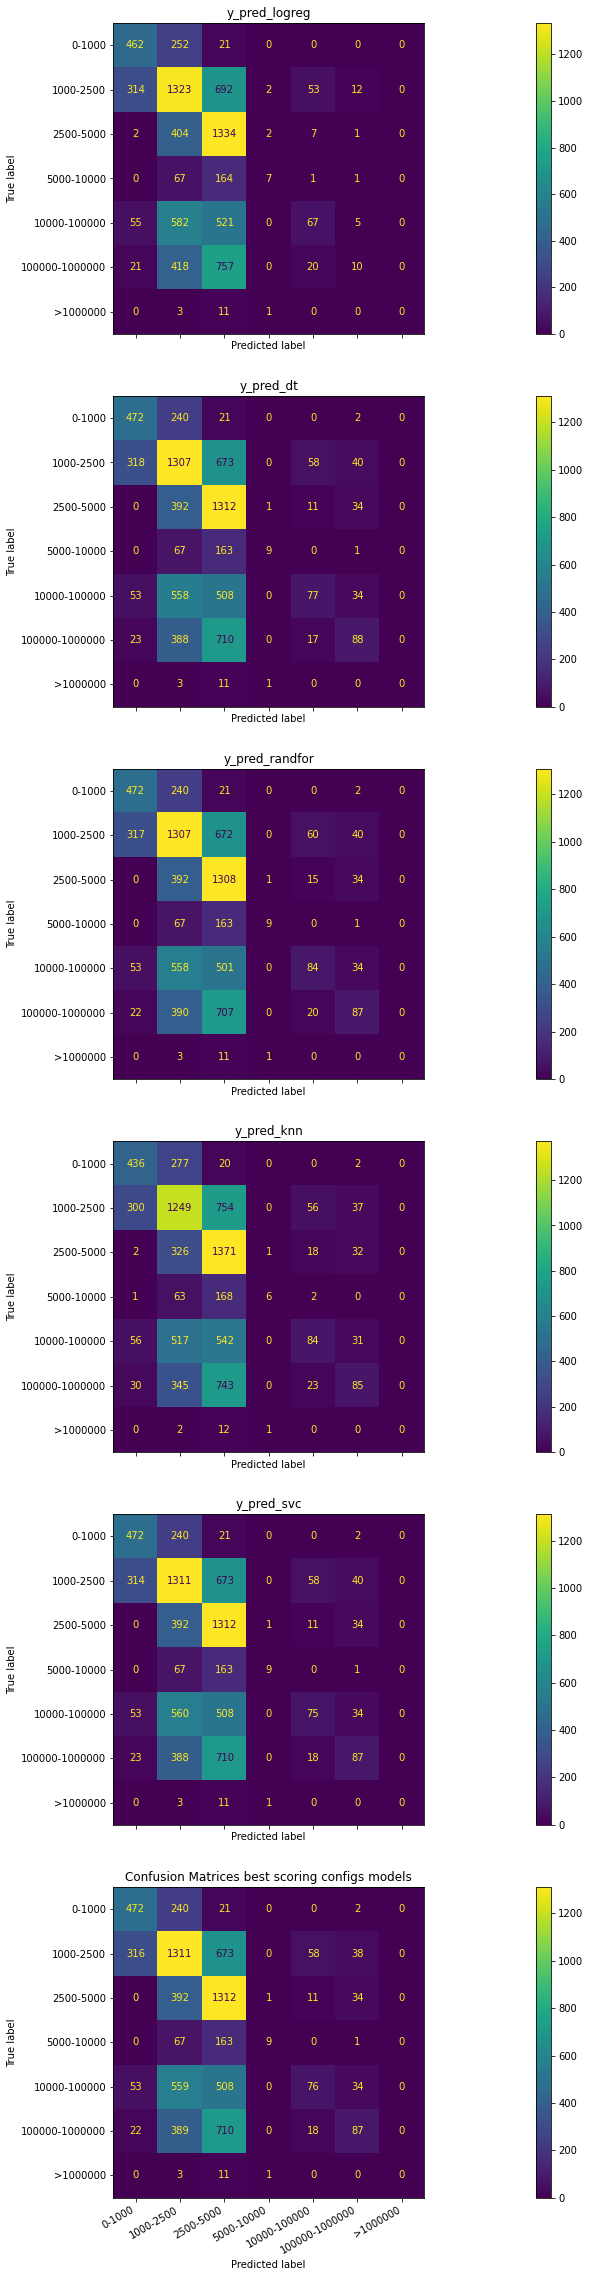

In [24]:
model_y_lists = []

model_preds = [y_pred_logreg, y_pred_dt, y_pred_randfor, y_pred_knn, y_pred_svc, y_pred_xgb]
n_models = len(model_preds)
model_pred_names = ["y_pred_logreg", "y_pred_dt", "y_pred_randfor", "y_pred_knn", "y_pred_svc", "y_pred_xgb"]

fig, ax = plt.subplots(n_models, 1, figsize=(40, 40), sharex=True)
for i, j in enumerate(model_preds):
    cm = confusion_matrix(y_val, j)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0-1000", "1000-2500", "2500-5000", "5000-10000", "10000-100000", "100000-1000000", ">1000000"])
    disp.plot(ax=ax[i])
    # ax[i].disp.plot(cmap=plt.cm.Blues)
    # ax[i].settitle('Confusion Matrix {0}'.format(j))
    ax[i].set_title(model_pred_names[i])

plt.title('Confusion Matrices best scoring configs models')  
plt.setp(ax[-1].get_xticklabels(), rotation=30, horizontalalignment='right')  
# plt.savefig("confusion_matrices_1.jpg")
plt.show()

In [ ]:
model_y_lists = []

model_preds = [y_pred_logreg, y_pred_dt, y_pred_randfor, y_pred_knn, y_pred_svc, y_pred_xgb]
n_models = len(model_preds)
model_pred_names = ["y_pred_logreg", "y_pred_dt", "y_pred_randfor", "y_pred_knn", "y_pred_svc", "y_pred_xgb"]

fig, ax = plt.subplots(n_models, 1, figsize=(40, 40), sharex=True)
for i, j in enumerate(model_preds):
    cm = confusion_matrix(y_val, j)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0-1000", "1000-2500", "2500-5000", "5000-10000", "10000-100000", "100000-1000000", ">1000000"])
    disp.plot(ax=ax[i])
    # ax[i].disp.plot(cmap=plt.cm.Blues)
    # ax[i].settitle('Confusion Matrix {0}'.format(j))
    ax[i].set_title(model_pred_names[i])

plt.title('Confusion Matrices best scoring configs models')  
plt.setp(ax[-1].get_xticklabels(), rotation=30, horizontalalignment='right')  
# plt.savefig("confusion_matrices_1.jpg")
plt.show()

In [25]:
print(max_accuracies)

{'LogisticRegression': 0.42189146469968386, 'DecisionTreeClassifier': 0.43005795574288724, 'RandomForestClassifier': 0.4303213909378293, 'KNeighborsClassifier': 0.4255795574288725, 'SVC': 0.4301896733403583, 'XGBClassifier': 0.4303213909378293}


In [26]:
acc_df = pd.DataFrame(max_accuracies, index=[0])
acc_df = acc_df.T
acc_df = acc_df.reset_index()
acc_df = acc_df.rename(columns={"index": "ML model", 0: "highest accuracy"})
print(acc_df)
acc_df.to_csv("accuracy_scores.csv")

                 ML model  highest accuracy
0      LogisticRegression          0.421891
1  DecisionTreeClassifier          0.430058
2  RandomForestClassifier          0.430321
3    KNeighborsClassifier          0.425580
4                     SVC          0.430190
5           XGBClassifier          0.430321


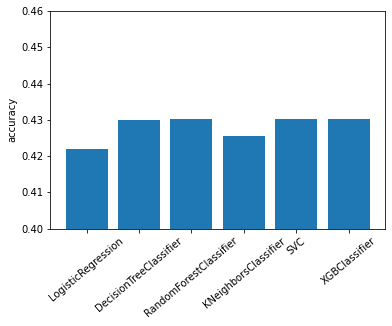

In [38]:
from matplotlib.transforms import Bbox

plt.bar(acc_df["ML model"], acc_df["highest accuracy"])
plt.ylim(0.40, 0.46)
plt.xticks(rotation=40)
plt.ylabel("accuracy")
plt.savefig("accuracy_scores_2.jpg", bbox_inches=Bbox([[-30,-30],fig.get_size_inches()]))
plt.show()

In [15]:
model = XGBClassifier()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

model.fit(X_train, y_train_enc)

y_pred_xgb_test = model.predict(X_test)
print(le.inverse_transform(y_pred_xgb_test))
print(type(le.inverse_transform(y_pred_xgb_test)))
print(le.inverse_transform(y_pred_xgb_test).shape)

['1000-2500' '1000-2500' '1000-2500' ... '1000-2500' '10000-100000'
 '1000-2500']
<class 'numpy.ndarray'>
(7592,)


In [ ]:
predicted_df = X_test.copy()
# print(predicted_df.shape)
# print(predicted_df.info())
# print("_______________________")
# print()
predicted_df_trim = predicted_df.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
predicted_df_trim["y_pred"] = le.inverse_transform(y_pred_xgb_test)
print(predicted_df_trim.shape)
# print(predicted_df_trim.info())

# print(predicted_df_trim.value_counts())
print("DonorStatus_Building Society")
predicted_df_trim_building = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Building Society"]==1]
print(predicted_df_trim_building["y_pred"].value_counts())
q = predicted_df_trim_building["y_pred"].value_counts().reset_index()
print()
print("DonorStatus_Friendly Society")
predicted_df_trim_friendly = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Friendly Society"]==1]
print(predicted_df_trim_friendly["y_pred"].value_counts())
p = predicted_df_trim_friendly["y_pred"].value_counts().reset_index()
print()
print("DonorStatus_Individual")
predicted_df_trim_indiv = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Individual"]==1]
print(predicted_df_trim_indiv["y_pred"].value_counts())
print()
print("DonorStatus_Limited Liability Partnership")
predicted_df_trim_llp = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Limited Liability Partnership"]==1]
print(predicted_df_trim_llp["y_pred"].value_counts())
print()
print("DonorStatus_Other")
predicted_df_trim_other = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Other"]==1]
print(predicted_df_trim_other["y_pred"].value_counts())
print()
print("DonorStatus_Public Fund")
predicted_df_trim_pubfund = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Public Fund"]==1]
print(predicted_df_trim_pubfund["y_pred"].value_counts())
print()
print("DonorStatus_Registered Political Party")
predicted_df_trim_rpp = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Registered Political Party"]==1]
print(predicted_df_trim_rpp["y_pred"].value_counts())
print()
print("DonorStatus_Trade Union")
predicted_df_trim_union = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Trade Union"]==1]
print(predicted_df_trim_union["y_pred"].value_counts())
print()
print("DonorStatus_Trust")
predicted_df_trim_trust = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Trust"]==1]
print(predicted_df_trim_trust["y_pred"].value_counts())
print()
print("DonorStatus_Unincorporated Association")
predicted_df_trim_uninc = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Unincorporated Association"]==1]
print(predicted_df_trim_uninc["y_pred"].value_counts())
print(type(predicted_df_trim_uninc["y_pred"].value_counts()))

In [ ]:
predicted_df = X_test.copy()
# print(predicted_df.shape)
# print(predicted_df.info())
predicted_df_trim = predicted_df.iloc[:, [24, 25, 26, 27]]
predicted_df_trim["y_pred"] = le.inverse_transform(y_pred_xgb_test)
predicted_df_trim["y_true"] = y_test
print(predicted_df_trim.shape)
print(predicted_df_trim.info())
print(predicted_df_trim.head(5))

In [70]:
print("gender_female")
predicted_df_trim_trust = predicted_df_trim.loc[predicted_df_trim["gender_female"]==1]
print(predicted_df_trim_trust["y_pred"].value_counts())
print(predicted_df_trim_trust["y_true"].value_counts())
print()
print()
print("gender_mostly_female")
predicted_df_trim_trust = predicted_df_trim.loc[predicted_df_trim["gender_mostly_female"]==1]
print(predicted_df_trim_trust["y_pred"].value_counts())
print(predicted_df_trim_trust["y_true"].value_counts())
print()
print()
print("gender_male")
predicted_df_trim_trust = predicted_df_trim.loc[predicted_df_trim["gender_male"]==1]
print(predicted_df_trim_trust["y_pred"].value_counts())
print(predicted_df_trim_trust["y_true"].value_counts())
print()
print()
print("gender_mostly_male")
predicted_df_trim_trust = predicted_df_trim.loc[predicted_df_trim["gender_mostly_male"]==1]
print(predicted_df_trim_trust["y_pred"].value_counts())
print(predicted_df_trim_trust["y_true"].value_counts())

gender_female
y_pred
1000-2500       333
10000-100000     18
0-1000           11
Name: count, dtype: int64
y_true
1000-2500         135
10000-100000       70
5000-10000         62
2500-5000          60
0-1000             29
100000-1000000      6
Name: count, dtype: int64


gender_mostly_female
y_pred
0-1000        26
5000-10000    22
2500-5000      2
1000-2500      1
Name: count, dtype: int64
y_true
1000-2500         21
0-1000            18
5000-10000         6
2500-5000          4
100000-1000000     1
10000-100000       1
Name: count, dtype: int64


gender_male
y_pred
10000-100000    1822
1000-2500        525
0-1000            93
5000-10000        31
2500-5000          5
Name: count, dtype: int64
y_true
1000-2500         715
10000-100000      707
5000-10000        424
2500-5000         369
0-1000            163
100000-1000000     94
>1000000            4
Name: count, dtype: int64


gender_mostly_male
y_pred
1000-2500       66
10000-100000    12
0-1000           3
5000-10000       2
Na

In [ ]:
print("DonorStatus_Building Society")
predicted_df_trim_building = predicted_df_trim.loc[predicted_df_trim["DonorStatus_Building Society"]==1]
print(predicted_df_trim_building["y_pred"].value_counts())
q = predicted_df_trim_building["y_pred"].value_counts().reset_index()
print()